### @Anshul Name and add description and ad a last updated (see other notebooks for example)

In [2]:
import nbimporter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils import DEVICE, init_random_seeds
from visualize._utils import plot_worm_data
from data._utils import pick_worm, load_dataset

# from data.CreateSyntheticDataset import (
#     time_delay_embedding,
#     plot_3d_trajectory,
#     plot_neural_signals,
#     plot_autocorrelation_and_pacf,
#     plot_crosscorrelation
# )  # works because of nbimporter

import torch

from tqdm import tqdm

import os

# Initialize the random seeds
init_random_seeds(40)

CUDA device found.
	 GPU: Tesla T4


['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11']

Avg num. neurons ID'd/recorded : 42/127
Range num. ID'd neurons : (31, 51)
Range len. calcium data : (2161, 3244)
worm6


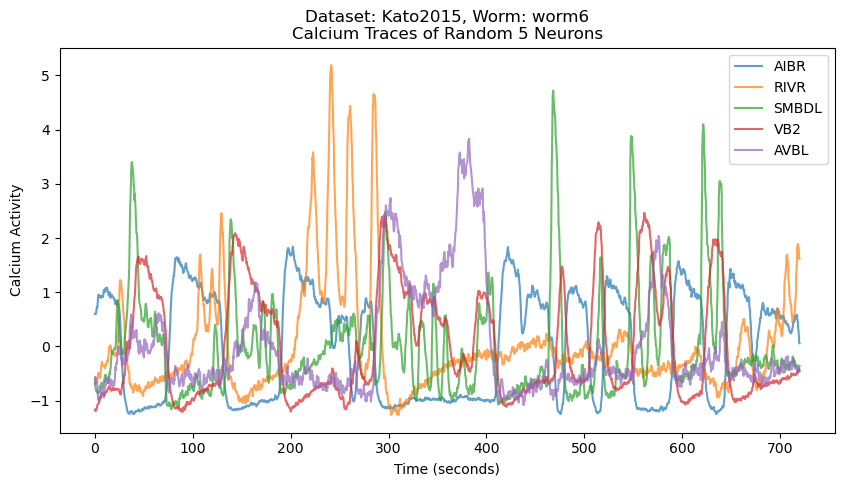

In [3]:
# @title Kato et al., Cell 2015, _Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans_
# @markdown Source: https://osf.io/2395t/

# load the dataset
dataset_name = "Kato2015"
Kato2015 = load_dataset(dataset_name)
print(list(Kato2015.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Kato2015.keys()):
    single_worm_dataset = pick_worm(Kato2015, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Kato2015)
    named_avg += named_neurons / len(Kato2015)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Kato2015.keys()))
print(worm)
single_worm_dataset = pick_worm(Kato2015, worm)

# plot the calcium activity for a few neurons
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

In [4]:
neural_activity = single_worm_dataset["calcium_data"]
neural_activity.shape

# TODO: for every worm, get data for named neurons + mask out bad neurons, know what labels, visualize reduced dimensionality trajectories of principal components
mask = single_worm_dataset["named_neurons_mask"]
recorded = neural_activity[:, mask]

In [5]:
neuron_labels = sorted(single_worm_dataset["named_neuron_to_slot"].keys())

In [6]:
print(recorded.numpy().astype("float32").transpose(1, 0).shape)

U, S, Vh = np.linalg.svd(recorded.numpy().astype("float32").transpose(1, 0), full_matrices=True)

print(U.shape)
print(Vh.shape)

(51, 2163)
(51, 51)
(2163, 2163)


In [7]:
print(S.shape)
S

(51,)


array([212.40999  ,  99.43567  ,  93.10332  ,  77.707535 ,  75.45455  ,
        67.630264 ,  62.92488  ,  56.13628  ,  49.42414  ,  45.067955 ,
        43.267555 ,  40.67106  ,  39.537563 ,  36.99575  ,  35.51153  ,
        33.98498  ,  31.036524 ,  29.247816 ,  25.943396 ,  25.5216   ,
        24.361473 ,  23.696268 ,  22.838306 ,  22.174606 ,  20.086302 ,
        19.087154 ,  17.731167 ,  16.605394 ,  15.592771 ,  15.127342 ,
        14.279338 ,  12.968266 ,  12.707103 ,  11.663353 ,  10.99786  ,
        10.750556 ,  10.344126 ,   9.803585 ,   9.4804   ,   8.806388 ,
         8.451456 ,   7.8270946,   7.3918023,   6.906817 ,   6.5780215,
         5.9359164,   5.772014 ,   4.4989924,   4.172367 ,   3.9144497,
         3.1743715], dtype=float32)

[4.12918673e-01 9.04896830e-02 7.93313480e-02 5.52638195e-02
 5.21057203e-02 4.18597624e-02 3.62376008e-02 2.88404094e-02
 2.23559276e-02 1.85887521e-02 1.71332357e-02 1.51385957e-02
 1.43065359e-02 1.25261714e-02 1.15412627e-02 1.05703353e-02
 8.81578008e-03 7.82891437e-03 6.15982348e-03 5.96115621e-03
 5.43152371e-03 5.13895218e-03 4.77355920e-03 4.50014441e-03
 3.69244976e-03 3.33424114e-03 2.87732488e-03 2.52355554e-03
 2.22515866e-03 2.09430500e-03 1.86608167e-03 1.53914109e-03
 1.47777232e-03 1.24497707e-03 1.10695757e-03 1.05773318e-03
 9.79269436e-04 8.79598556e-04 8.22560679e-04 7.09758060e-04
 6.53698643e-04 5.60680104e-04 5.00052139e-04 4.36586255e-04
 3.96009048e-04 3.22470664e-04 3.04908371e-04 1.85244458e-04
 1.59323455e-04 1.40234761e-04 9.22210668e-05]
[212.40998521  99.43566916  93.1033021   77.70753203  75.45453885
  67.63025842  62.92487852  56.13624741  49.42412786  45.06794812
  43.26755576  40.67105736  39.53756435  36.99575052  35.51152561
  33.98498237  31.03652

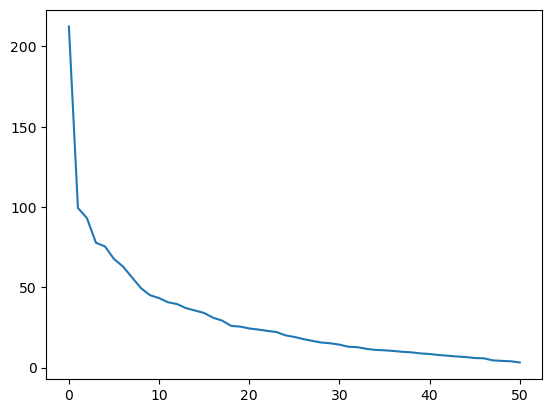

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=recorded.shape[1])
pca.fit(recorded)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

reduced_dim = pca.transform(recorded)

# plt.plot(reduced_dim[:, 0], reduced_dim[:, 1])
plt.plot(pca.singular_values_)

In [9]:
pca.score(recorded)

-27.683016827346698

['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', 'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', 'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', 'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', 'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43']

Avg num. neurons ID'd/recorded : 34/108
Range num. ID'd neurons : (23, 43)
Range len. calcium data : (3242, 3244)


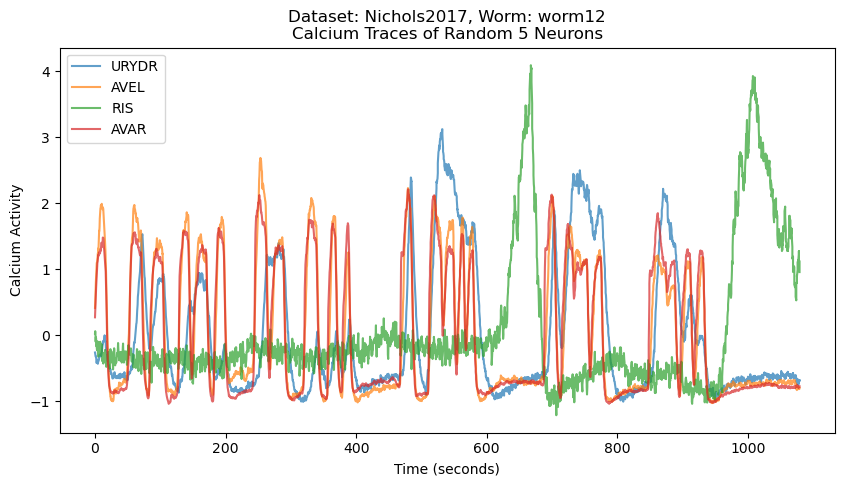

In [10]:
# @title Nichols et al., Science 2017, _A global brain state underlies C. elegans sleep behavior_
# @markdown Source: https://osf.io/kbf38/

# load the dataset
dataset_name = "Nichols2017"
Nichols2017 = load_dataset(dataset_name)
print(list(Nichols2017.keys()), end="\n\n")

# number of ID'd neurons versus number of neurons measured
neurons_stats = dict(min=float("inf"), max=float("-inf"))
timesteps_stats = dict(min=float("inf"), max=float("-inf"))
total_avg, named_avg = 0, 0
for worm in list(Nichols2017.keys()):
    single_worm_dataset = pick_worm(Nichols2017, worm)
    total_neurons = single_worm_dataset["num_neurons"]
    named_neurons = single_worm_dataset["num_named_neurons"]
    max_timesteps = single_worm_dataset["max_timesteps"]
    total_avg += total_neurons / len(Nichols2017)
    named_avg += named_neurons / len(Nichols2017)
    neurons_stats["min"] = min(neurons_stats["min"], named_neurons)
    neurons_stats["max"] = max(neurons_stats["max"], named_neurons)
    timesteps_stats["min"] = min(timesteps_stats["min"], max_timesteps)
    timesteps_stats["max"] = max(timesteps_stats["max"], max_timesteps)
print(f"Avg num. neurons ID'd/recorded : {int(named_avg)}/{int(total_avg)}")
print(f"Range num. ID'd neurons : ({neurons_stats['min']}, {neurons_stats['max']})")
print(f"Range len. calcium data : ({timesteps_stats['min']}, {timesteps_stats['max']})")

# get data for one worm
worm = np.random.choice(list(Nichols2017.keys()))
single_worm_dataset = pick_worm(Nichols2017, worm)

# plot the calcium activity
plot_worm_data(single_worm_dataset, num_neurons=5, smooth=True)

In [11]:
neural_activity = single_worm_dataset["calcium_data"]
neural_activity.shape

print(neural_activity.numpy().astype("float32").transpose(1, 0).shape)

U, S, Vh = np.linalg.svd(
    neural_activity.numpy().astype("float32").transpose(1, 0), full_matrices=True
)

print(S.shape)
S[:130]

(302, 3242)
(302,)


array([2.77015442e+02, 2.28633591e+02, 1.68314117e+02, 1.35983673e+02,
       1.16317093e+02, 1.02032852e+02, 8.90180206e+01, 8.65470276e+01,
       8.22420502e+01, 7.98635178e+01, 7.49740677e+01, 7.03944397e+01,
       6.62577896e+01, 6.33088150e+01, 6.04695702e+01, 5.93272667e+01,
       5.87532120e+01, 5.56040726e+01, 5.38580666e+01, 5.19626694e+01,
       4.95285568e+01, 4.90914307e+01, 4.85893707e+01, 4.59493332e+01,
       4.48272057e+01, 4.39223442e+01, 4.28571510e+01, 4.19851532e+01,
       4.06540909e+01, 4.02855797e+01, 3.98803101e+01, 3.86419525e+01,
       3.84413147e+01, 3.81672096e+01, 3.65109482e+01, 3.59501915e+01,
       3.58475533e+01, 3.47795753e+01, 3.46880493e+01, 3.44402084e+01,
       3.37781754e+01, 3.30814781e+01, 3.27310028e+01, 3.23869858e+01,
       3.20703506e+01, 3.14420280e+01, 3.12701912e+01, 3.06892586e+01,
       3.05203571e+01, 3.00446606e+01, 2.99694061e+01, 2.94624481e+01,
       2.89053993e+01, 2.86880264e+01, 2.82218723e+01, 2.80012245e+01,
      

In [12]:
neural_activity = single_worm_dataset["calcium_data"]
neural_activity.shape

# TODO: for every worm, get data for named neurons + mask out bad neurons, know what labels, visualize reduced dimensionality trajectories of principal components
mask = single_worm_dataset["named_neurons_mask"]
recorded = neural_activity[:, mask]

[0.40755418 0.11942669 0.08896539 0.06195851]



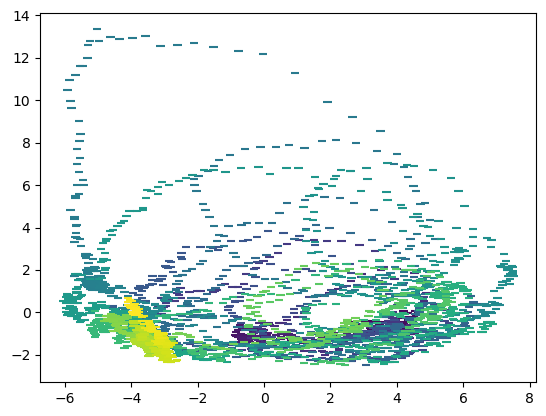

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(recorded)

print(pca.explained_variance_ratio_)
print()

reduced_dim = pca.transform(recorded)

c = np.tan(np.linspace(-1, 1, reduced_dim[:, 0].shape[0]))
plt.scatter(reduced_dim[:, 0], reduced_dim[:, 1], c=c, marker="_")

[0.40755418 0.11942669 0.08896539 0.06195852]



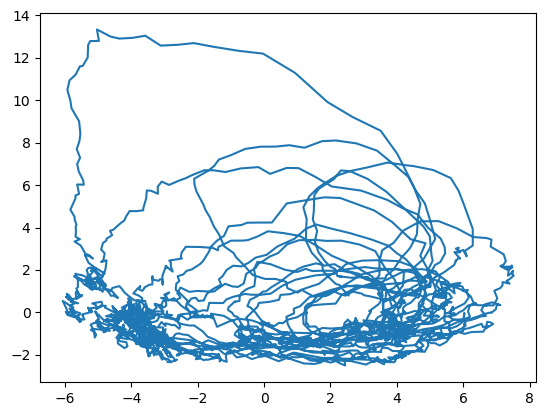

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(recorded)

print(pca.explained_variance_ratio_)
print()

reduced_dim = pca.transform(recorded)

c = np.tan(np.linspace(-1, 1, reduced_dim[:, 0].shape[0]))
plt.plot(reduced_dim[:, 0], reduced_dim[:, 1])